<a href="https://www.kaggle.com/code/ameys97/nb-2-scikitlearn-classifiers?scriptVersionId=196707093" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Notebook 2 - Basic Classification on MNIST Data Using Scikit-learn¶

## Objectives :
- Load the MNIST dataset using Sci-Kit Learn
- Apply different ML Classification techniques on MNIST Dataset
- Evaluate all the models using various metrics
- Learn more about Sci-Kit Learn during this process

## Section 1 - Introduction to Classification and Classifier Algorithms

### What is Classification?

- Classification is a supervised machine learning method where the model tries to predict the correct label of a given input data
- In our Problem we are trying to guess the lable of the image 

### Types of Classification Tasks

1. Bianry classification
    - In a binary classification task, the goal is to classify the input data into two mutually exclusive categories.
    - e.g. 1/0, spam/not spam etc
    - Logistic Regression and Support Vector Machines algorithms are natively designed for binary classifications
2. Multi-Class classification
    - The multi-class classification has at least two mutually exclusive class labels, where the goal is to predict to which class a given input example belongs to
    - Superset of binary classification
    - Random Forest, Naive Bayes, K-Nearest Neighbors, Gradient Boosting are algorithms designed for these types of tasks
    - But we can apply binary transformation approaches such as one-versus-one and one-versus-all to adapt native binary classification algorithms like Support Vector Machine, Logistic Regressionfor multi-class classification tasks
        - One-versus-one: 
            - This strategy trains as many classifiers as there are pairs of labels
            - In general, for N labels, we will have Nx(N-1)/2 classifiers
            - Each classifier is trained on a single binary dataset, and the final class is predicted by a majority vote between all the classifiers
            - One-vs-one approach works best for SVM and other kernel-based algorithms
        - One-versus-rest
            - We start by considering each label as an independent label and consider the rest combined as only one label
            - In general, for N labels, we will have N binary classifiers
3. Multi-Label classification
    -  In multi-label classification tasks, we try to predict 0 or more classes for each input example
    - In this case, there is no mutual exclusion because the input example can have more than one label
    
### Metrics to Evaluate Machine Learning Classification Algorithms
1. Confusion Matrix
    ![Confusion Matrix](https://www.unite.ai/wp-content/uploads/2019/12/Preventive_Medicine-e1576294312614.png)
    - A 2x2 matrix that summarizes the number of correct predictions of the model
2. Acurracy 
    - Out of predicitons made by the model, what percentage is correct?
3. Precision
    - Out of all Yes Predictions, how many of them were correct?
4. Recall Sensitivity
    - How good was the model at predicting real Yes events?
5. Recall Specificity
    - How good was the model at predicting real No events?
6. F1 score
    - It is sometimes used while dealing with imbalanced dataset, meaning that there are more of one class/label than there are of the other
    - Harmonic mean of precision and recall
    $$ F1  = 2 x \frac { PRECISION x RECALL } { PRECISION + RECALL } $$
7. AUC-ROC curve
    - AUC-ROC generates probability values instead of binary values
    - Use when dataset is roughly balanced otherwise it leads to incorrect interpretation
    - ROC curves provides good overview of trade-off between the TP rate and the FP rate for binary classifier using different probability thresholds
    - Criterias:
        - A value < 0.5 : a poor classifier
        - A value = 0.5 : a random classifier
        - A value > 0.7 : a good classifier
        - A value = 0.8 : a strong classifier
        - A value = 1.0 : a perfectly predicting classifier
        
#### Strategies to choose the right metric
- Choose Accuracy
    - When the cost of FP and FN are roughly equal
    - When the benefit of TP and TN are roughly equal
- Choose Precision
    - When the cost of FP is much higher than FN
    - When the benefit of TP is much higher than TN
- Choose Recall
    - When the cost of FN is much higher than FP
    - When the cost of TN is much higher than TP
- Choose AUC-ROC and Precesion-Recall Curve
    - Use ROC when dealing with balanced datasets
    - Use Precision-Recall when dealing with imbalanced datasets
    
Excellent Reference article about Classification [https://www.datacamp.com/blog/classification-machine-learning]

## Section 2 - Loading and Preparing the data

In [1]:
# import libraries that are useful for us
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# fetching the data
from sklearn.datasets import fetch_openml
mnist_skl = fetch_openml("mnist_784")

In [3]:
# Check balance of data
mnist_skl.target.value_counts()

class
1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: count, dtype: int64

- All the values are almost the same so we can say that this dataset is **"Balanced"**, but it is important that **training** dataset is **balanced**.

### Dividing the dataset into training data and test data.

In [4]:
# Necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    mnist_skl.data, mnist_skl.target, 
    test_size=0.2, random_state=1997
)
print('Training data and target sizes: \n{}, {}'.format(X_train.shape,y_train.shape))
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,y_test.shape))

Training data and target sizes: 
(56000, 784), (56000,)
Test data and target sizes: 
(14000, 784), (14000,)


In [6]:
(X_train < 0).values.any()

False

In [7]:
# Check balance of training data
y_train.value_counts()

class
1    6340
7    5871
3    5707
2    5598
0    5526
9    5518
6    5498
8    5481
4    5410
5    5051
Name: count, dtype: int64

[]

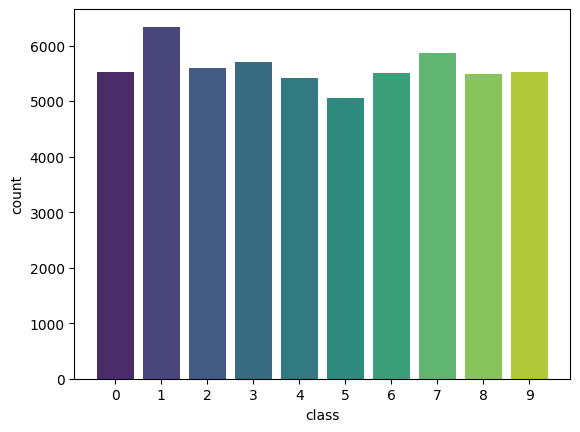

In [8]:
train_balance = y_train.value_counts().reset_index()
sns.barplot(x="class", y="count", data=train_balance, palette="viridis")
plt.plot()

In [9]:
# Function For Model Training
def train_model(X_train, y_train, model, scaling=1):
    
    # Split data into features and labels
    X_train, y_train = X_train.values, y_train.values
    print('Data Splitted Successfully')
    
    # Scale features
    if scaling==1:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
    else:
        scaler = None
        X_train_scaled = X_train
    print('The Training data is scaled properly')
    
    # Train the model
    print(f"The training of the model {model} is started, please wait for while as it may take few minutes to complete")
    model.fit(X_train_scaled, y_train)
    print(f'The Model {model} is trained well')
    
    return model, scaler

- We scale data to ensure that no single feature dominates the distance calculations in an algorithm, and can help to improve the performance of the algorithm
- When to use standardization and when do not: Refer [https://builtin.com/data-science/when-and-why-standardize-your-data]

In [10]:
# Function For Model Evaluation
def evaluate_model(model, X_test, y_test, scaler):
    
    # Scale features of test set data
    if scaler == None:
        X_test_scaled = X_test
    else:
        X_test_scaled = scaler.fit_transform(X_test)
    print('The Testing data is scaled properly')
    
    # Predict on test set
    y_pred = model.predict(X_test_scaled)
    print(f'The predictions on Test data are done. Evaluation of model {model} is now beginning')
    
    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    
    # Calculate precision and recall
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    
    # Calculate F1 score
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Check if the model has predict_proba method
    if hasattr(model, 'predict_proba'):
        
        # Determine if it's a binary or multi-class problem
        n_classes = len(np.unique(y_test))
        if n_classes == 2:
            # Binary classification
            fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
            roc_auc = auc(fpr, tpr)

            # Plot AUC-ROC curve
            plt.figure(figsize=(10, 8))
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic (ROC) curve')
            plt.legend(loc="lower right")
            plt.show()
            
            avg_auc = roc_auc
            
        else:
            # Multi-class classification
            auc_scores = []
            for i in range(n_classes):
                # Ensure we have positive samples for this class
                mask = (y_test == i) & (model.predict_proba(X_test)[:, i] > 0)
                if np.any(mask):
                    fpr, tpr, _ = roc_curve(y_test[mask], model.predict_proba(X_test)[mask][:, i])
                    auc_score = auc(fpr, tpr)
                    auc_scores.append(auc_score)
                else:
                    auc_scores.append(0)  # Assign 0 AUC if no positive samples

            # Calculate average AUC-ROC score
            avg_auc = sum(auc_scores) / len(auc_scores)
            
    else:
        print("Warning: Model does not have predict_proba method. Skipping AUC-ROC calculation.")
        avg_auc = 0.00
        
    # Print evaluation metrics
    print(f"\nEvaluation Metrics of model {model}:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Average AUC-ROC: {avg_auc:.4f}")

    return acc, prec, rec, f1, avg_auc, cm

- Now we are set to test our classifier against MNIST dataset

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# Function For Model Cross Validation
def cross_validate_model(model, num_folds=3, scaling=1, X=None, y=None):
    
    # Scale features
    if scaling==1:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
    else:
        scaler = None
        X_scaled = X
    print('The data is scaled properly')
    
    # Perform k-fold cross-validation
    score = cross_val_score(model, X_scaled, y, cv=num_folds, scoring='accuracy', n_jobs=-1)
#     cv_results = cross_validate(
#         model,
#         X_scaled,
#         y,
#         cv=num_folds,
#         scoring=['accuracy', 'precision', 'recall', 'f1'],
#         return_estimator=True
#     )
    print('The k-fold cross-validation is performed on whole data properly')
    
#     print("CV Results:")
#     print(cv_results)
    
    # Evaluate model on full dataset
    model.fit(X_scaled, y)
    y_pred = model.predict(X_scaled)
    
    print(f'The predictions on data are done. Evaluation of model {model} is now beginning...')
    
    # Calculate evaluation metrics
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred, average='weighted')
    rec = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    
    # Plot confusion matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix ({model})')
    plt.show()
        
#     # Handle potential NaN values in cv_results
#     def safe_mean(arr):
#         return np.nanmean(arr) if np.isnan(np.mean(arr)) else np.mean(arr)
    
    # Print cross-validation scores
    print(f"For the model {model}:")
    print("Cross-validation Scores:")
    print(f"Accuracy: {np.mean(score):.4f} ± {np.std(score):.4f}")
#     for metric, score_key in zip(['Accuracy', 'Precision', 'Recall', 'F1 Score'], ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']):
#         score = cv_results[score_key]
#         print(f"{metric}: {safe_mean(score):.4f} ± {np.std(score):.4f}")

    # Print test set evaluation
    print("\nTest Set Evaluation:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    return np.mean(score), acc, prec, rec, f1, cm


- Refer this webpage for learning how to use multicore processing for sklearn [https://machinelearningmastery.com/multi-core-machine-learning-in-python/]

## Section 3 - Training Classifier models and evaluating them
### Logistic Regression
#### Baseline model

In [12]:
# Import the model
from sklearn.linear_model import LogisticRegression

# Create the model object, all default values
logistic_bl_model = LogisticRegression(
    penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, 
    random_state=1497, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=-1, l1_ratio=None
) # multi-core processing n_job=-1 ie all possible cores (default=None ie 1)

# Train the model
trained_logistic_bl, scaler_lr_bl = train_model(X_train, y_train, logistic_bl_model, scaling = 0)

Data Splitted Successfully
The Training data is scaled properly
The training of the model LogisticRegression(n_jobs=-1, random_state=1497) is started, please wait for while as it may take few minutes to complete
The Model LogisticRegression(n_jobs=-1, random_state=1497) is trained well


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The Testing data is scaled properly
The predictions on Test data are done. Evaluation of model LogisticRegression(n_jobs=-1, random_state=1497) is now beginning


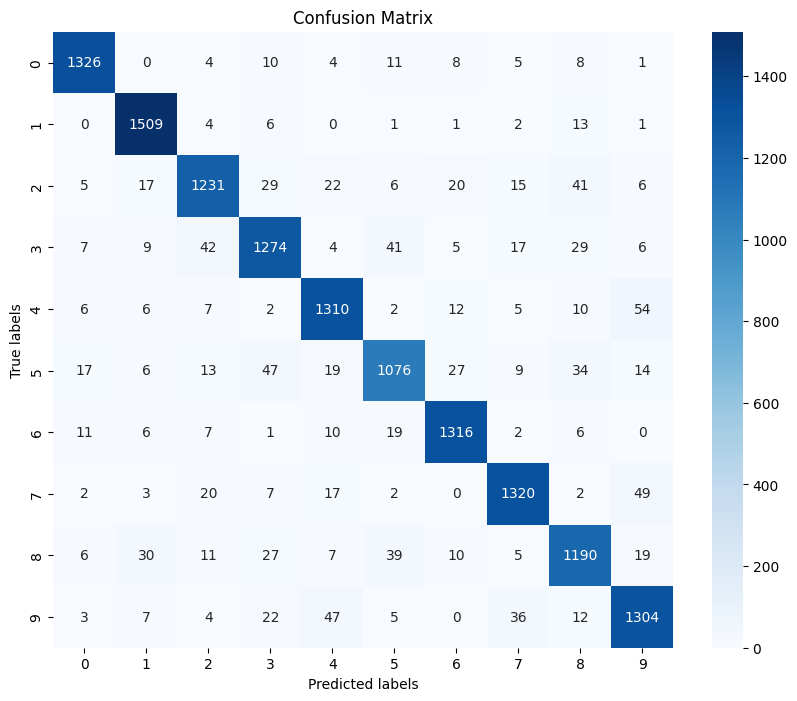


Evaluation Metrics of model LogisticRegression(n_jobs=-1, random_state=1497):
Accuracy: 0.9183
Precision: 0.9180
Recall: 0.9183
F1 Score: 0.9180
Average AUC-ROC: 0.0000


In [13]:
# Evaluate the model
accuracy_lr_bl, precision_lr_bl, recall_lr_bl, f1_score_lr_bl, roc_auc_lr_bl, cm_lr_bl = evaluate_model(trained_logistic_bl, X_test, y_test, scaler_lr_bl)

- Accuracy is around 92% for baseline model without any parametrers tunning 

#### Model with k-fold cross validation k=3

- we are taking same baseline Logistic Regression model as above

The data is scaled properly


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

The k-fold cross-validation is performed on whole data properly


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The predictions on data are done. Evaluation of model LogisticRegression(max_iter=2500, n_jobs=4, random_state=1497) is now beginning...


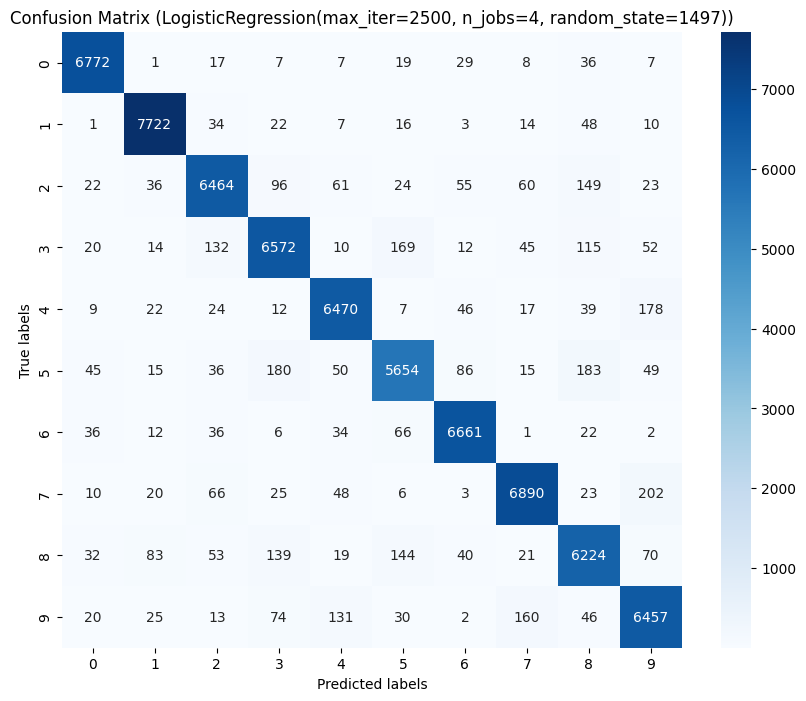

For the model LogisticRegression(max_iter=2500, n_jobs=4, random_state=1497):
Cross-validation Scores:
Accuracy: 0.9093 ± 0.0048

Test Set Evaluation:
Accuracy: 0.9412
Precision: 0.9412
Recall: 0.9412
F1 Score: 0.9412


In [14]:
from sklearn.linear_model import LogisticRegression
logistic_bl_model = LogisticRegression(
    penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, 
    random_state=1497, solver='lbfgs', max_iter=2500, multi_class='auto', verbose=0, warm_start=False, n_jobs=4, l1_ratio=None
)

cv_score_lr_bl_cv, accuracy_lr_bl_cv, precision_lr_bl_cv, recall_lr_bl_cv, f1_score_lr_bl_cv, cm_lr_bl_cv = cross_validate_model(
    logistic_bl_model, scaling = 0, X=mnist_skl.data, y=mnist_skl.target
)

- small increase in accuracy from 91.83% to 92.01% after cross validation with 5 folds
- For 3 fold cross validation, accuracy is negeligebly increased from 91.83% to 91.86% But there was warning "ConvergenceWarning: lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT." So I will increase max_iter to 2500 and run again.
- Still Convergence warning but Accuracy decreased to 90.93%, I think the time taken for model is significantly increased after increasing max iterations. So I think SGD Classifier is better than Logistic Classifier

### Support Vector Machines
#### Baseline Model

In [15]:
# Import the model
from sklearn.svm import LinearSVC

# Create the model object
svm_bl_model = LinearSVC(
    penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, 
    class_weight=None, verbose=0, random_state=1497, max_iter=1000
)

# Train the model
trained_svm_bl, scaler_svm_bl = train_model(X_train, y_train, svm_bl_model)

Data Splitted Successfully
The Training data is scaled properly
The training of the model LinearSVC(random_state=1497) is started, please wait for while as it may take few minutes to complete
The Model LinearSVC(random_state=1497) is trained well


- Tried to run model with SVC first, but it is taking too much time. Then trying LinearSVC which is also taking so much time
- Note: If using SVC, a better way would be to randomly sample few data points as for SVM all data points are not needed anyways to form the decision boundary (or support vectors). It may be a good way to discard around 85-90% of the data and see the classification performance.

The Testing data is scaled properly
The predictions on Test data are done. Evaluation of model LinearSVC(random_state=1497) is now beginning


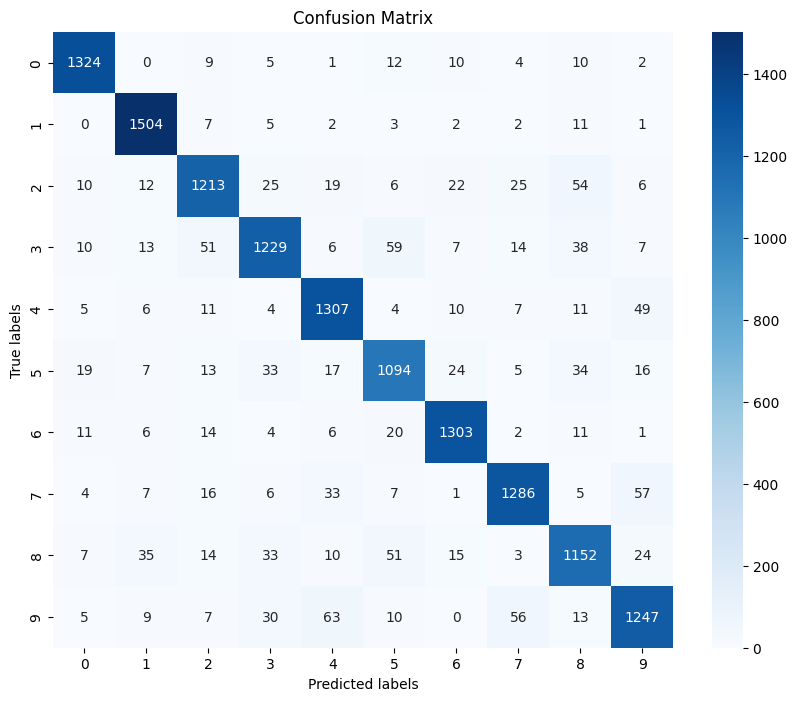


Evaluation Metrics of model LinearSVC(random_state=1497):
Accuracy: 0.9042
Precision: 0.9039
Recall: 0.9042
F1 Score: 0.9039
Average AUC-ROC: 0.0000


In [16]:
# Evaluate the model
accuracy_svm_bl, precision_svm_bl, recall_svm_bl, f1_score_svm_bl, roc_auc_svm_bl, cm_svm_bl = evaluate_model(trained_svm_bl, X_test, y_test, scaler_svm_bl)

- Accuracy is around 90% for baseline model without any parametrers tunning 

#### SVC model with parameters changed

In [17]:
# Import the model
from sklearn.svm import SVC

# Create the model object
svm_svc_model = SVC(
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight='balanced', # default - None
    verbose=False,
    max_iter=-1, 
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)

# Train the model
trained_svm_svc, scaler_svm_svc = train_model(X_train, y_train, svm_svc_model)

Data Splitted Successfully
The Training data is scaled properly
The training of the model SVC(class_weight='balanced') is started, please wait for while as it may take few minutes to complete
The Model SVC(class_weight='balanced') is trained well


The Testing data is scaled properly
The predictions on Test data are done. Evaluation of model SVC(class_weight='balanced') is now beginning


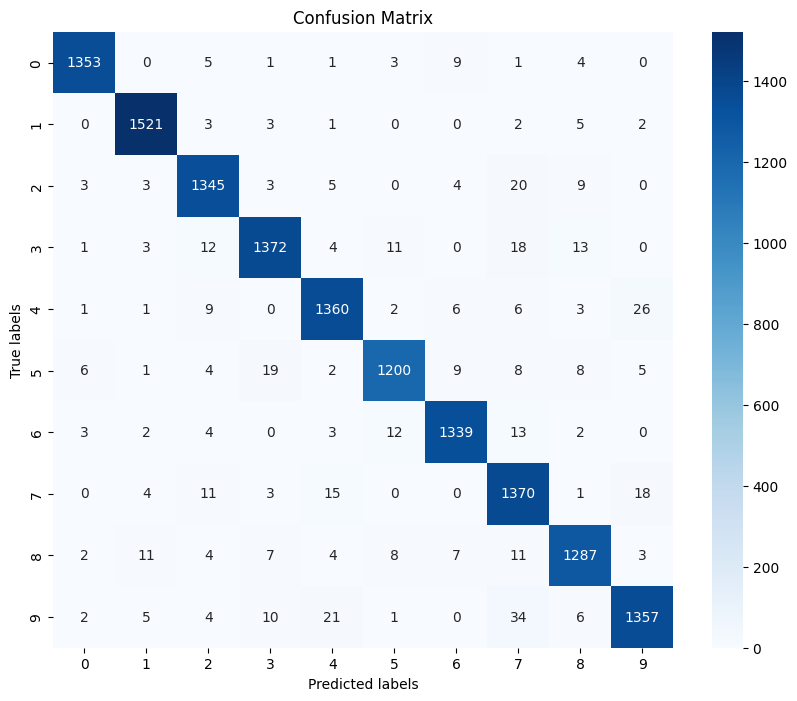


Evaluation Metrics of model SVC(class_weight='balanced'):
Accuracy: 0.9646
Precision: 0.9648
Recall: 0.9646
F1 Score: 0.9646
Average AUC-ROC: 0.0000


In [18]:
# Evaluate the model
accuracy_svm_svc, precision_svm_svc, recall_svm_svc, f1_score_svm_svc, roc_auc_svm_svc, cm_svm_svc = evaluate_model(trained_svm_svc, X_test, y_test, scaler_svm_svc)

- Accuracy is around 96% for baseline model without any parametrers tunning 
- Accuracy is better than LinearSVC but taking little bit more time. We will go ahead with SVC.

#### SVC Model with k-fold cross validation k=3

- we are taking same baseline SVC model as above

The data is scaled properly
The k-fold cross-validation is performed on whole data properly
The predictions on data are done. Evaluation of model SVC(class_weight='balanced') is now beginning...


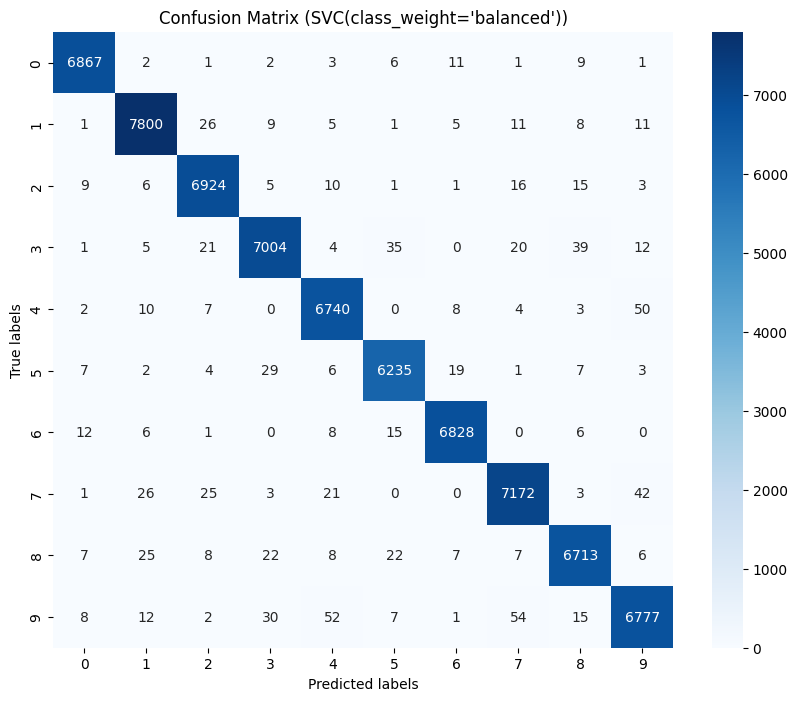

For the model SVC(class_weight='balanced'):
Cross-validation Scores:
Accuracy: 0.9617 ± 0.0018

Test Set Evaluation:
Accuracy: 0.9866
Precision: 0.9866
Recall: 0.9866
F1 Score: 0.9866


In [19]:
from sklearn.svm import SVC
svm_svc_model = SVC(
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight='balanced', # default - None
    verbose=False,
    max_iter=-1, 
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)

cv_score_svm_svc_cv, accuracy_svm_svc_cv, precision_svm_svc_cv, recall_svm_svc_cv, f1_score_svm_svc_cv, cm_svm_svc_cv = cross_validate_model(
    svm_svc_model, X=mnist_skl.data, y=mnist_skl.target
)

- Accuracy decreased from 96.46% to 96.17% which is very negeligeble.

### Decision Tree
#### Baseline Model - Gini

In [20]:
# Import the model
from sklearn.tree import DecisionTreeClassifier

# Create the model object
dt_bl_gini_model = DecisionTreeClassifier(
    criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, max_features=None, random_state=1497, max_leaf_nodes=None, min_impurity_decrease=0.0, 
    class_weight=None, ccp_alpha=0.0
)

# Train the model
trained_dt_bl_gini, scaler_dt_bl_gini = train_model(X_train, y_train, dt_bl_gini_model, 0)

Data Splitted Successfully
The Training data is scaled properly
The training of the model DecisionTreeClassifier(random_state=1497) is started, please wait for while as it may take few minutes to complete
The Model DecisionTreeClassifier(random_state=1497) is trained well


The Testing data is scaled properly
The predictions on Test data are done. Evaluation of model DecisionTreeClassifier(random_state=1497) is now beginning


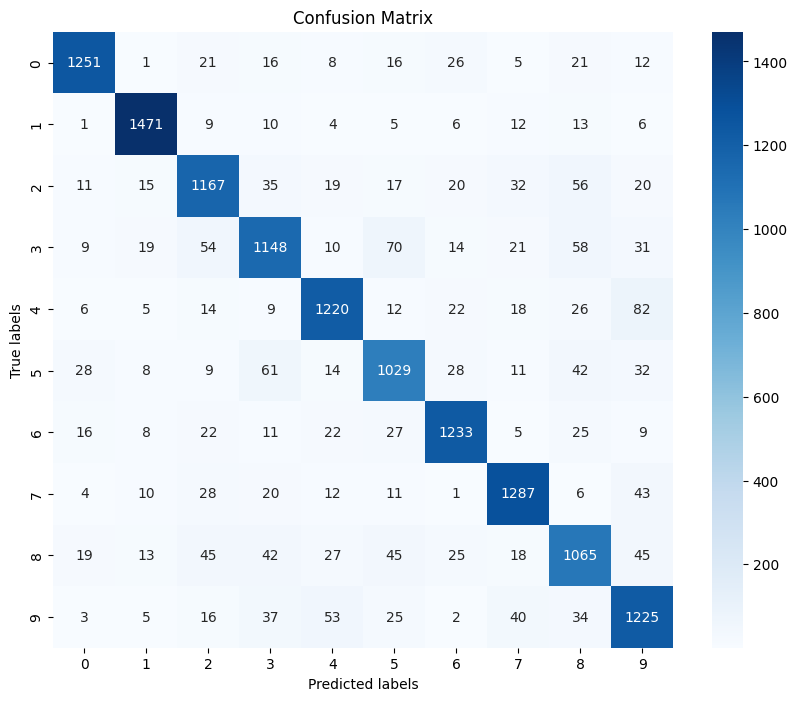


Evaluation Metrics of model DecisionTreeClassifier(random_state=1497):
Accuracy: 0.8640
Precision: 0.8641
Recall: 0.8640
F1 Score: 0.8640
Average AUC-ROC: 0.0000


In [21]:
# Evaluate the model
accuracy_dt_bl_gini, precision_dt_bl_gini, recall_dt_bl_gini, f1_score_dt_bl_gini, avg_auc_dt_bl_gini, cm_dt_bl_gini = evaluate_model(
    trained_dt_bl_gini, X_test, y_test, scaler_dt_bl_gini
)

- Accuracy is around 86% for baseline model without any parametrers tunning 

#### Baseline Model- Information Gain

In [22]:
# Import the model
from sklearn.tree import DecisionTreeClassifier

# Create the model object
dt_bl_entropy_model = DecisionTreeClassifier(
    criterion='gini', random_state=1497
)

# Train the model
trained_dt_entropy, scaler_dt_ent = train_model(X_train, y_train, dt_bl_entropy_model, 0)

Data Splitted Successfully
The Training data is scaled properly
The training of the model DecisionTreeClassifier(random_state=1497) is started, please wait for while as it may take few minutes to complete
The Model DecisionTreeClassifier(random_state=1497) is trained well


The Testing data is scaled properly
The predictions on Test data are done. Evaluation of model DecisionTreeClassifier(random_state=1497) is now beginning


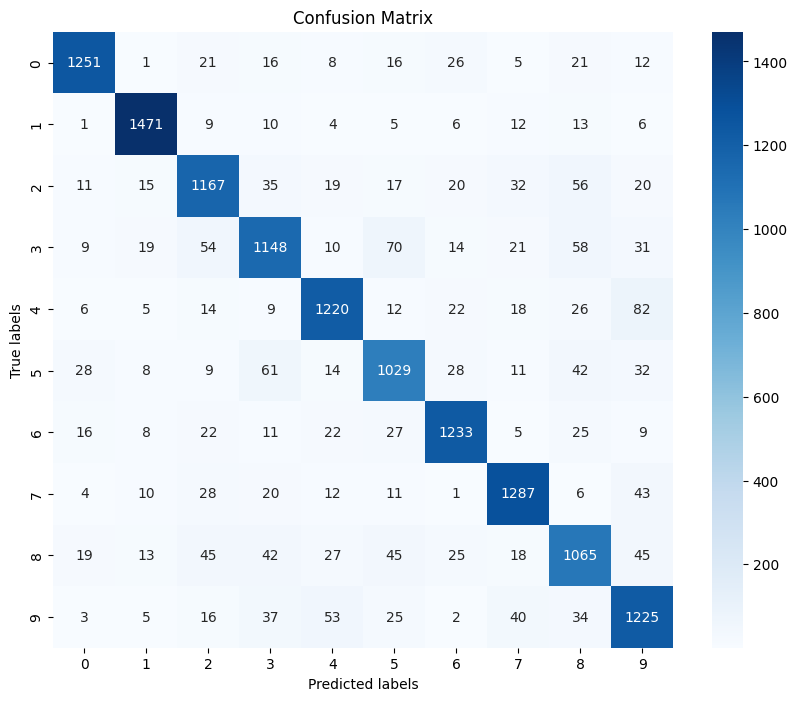


Evaluation Metrics of model DecisionTreeClassifier(random_state=1497):
Accuracy: 0.8640
Precision: 0.8641
Recall: 0.8640
F1 Score: 0.8640
Average AUC-ROC: 0.0000


In [23]:
# Evaluate the model
accuracy_dt_bl_ent, precision_dt_bl_ent, recall_dt_bl_ent, f1_score_dt_bl_ent, avg_auc_dt_bl_ent, cm_dt_bl_ent = evaluate_model(trained_dt_entropy, X_test, y_test, scaler_dt_ent)

- Accuracy is around 86% for baseline model without any parametrers tunning 
- No difference between both baseline models so we go further with 'gini' trees.

#### Model with k-fold cross validation k=3

- we are taking same baseline model as above

The data is scaled properly
The k-fold cross-validation is performed on whole data properly
The predictions on data are done. Evaluation of model DecisionTreeClassifier(random_state=1497) is now beginning...


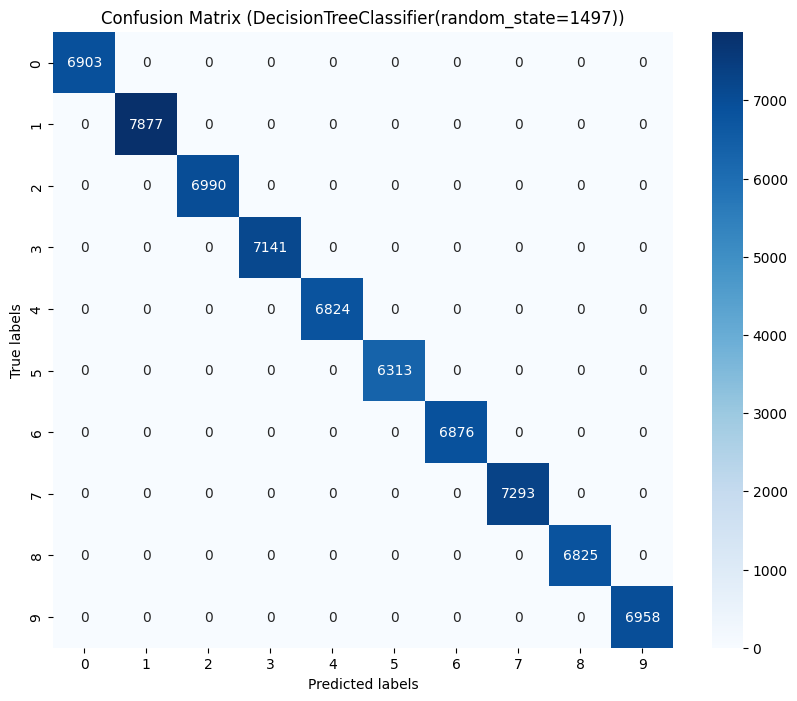

For the model DecisionTreeClassifier(random_state=1497):
Cross-validation Scores:
Accuracy: 0.8652 ± 0.0058

Test Set Evaluation:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


In [24]:
from sklearn.tree import DecisionTreeClassifier
dt_bl_gini_model = DecisionTreeClassifier(
    criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, max_features=None, random_state=1497, max_leaf_nodes=None, min_impurity_decrease=0.0, 
    class_weight=None, ccp_alpha=0.0
)

cv_score_dt_bl_gini_cv, accuracy_dt_bl_gini_cv, precision_dt_bl_gini_cv, recall_dt_bl_gini_cv, f1_score_dt_bl_gini_cv, cm_dt_bl_gini_cv = cross_validate_model(
    dt_bl_gini_model, scaling = 0, X=mnist_skl.data, y=mnist_skl.target
)

- Accuracy increased from 86.30% to 86.52% which is very negeligeble.

### Random Forest
#### Baseline Model

In [25]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

# Create the model object
rf_bl_model = RandomForestClassifier(
    n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
    max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=-1, 
    random_state=1497, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None
)

# Train the model
trained_rf_bl, scaler_rf_bl = train_model(X_train, y_train, rf_bl_model, 0)

Data Splitted Successfully
The Training data is scaled properly
The training of the model RandomForestClassifier(n_jobs=-1, random_state=1497) is started, please wait for while as it may take few minutes to complete
The Model RandomForestClassifier(n_jobs=-1, random_state=1497) is trained well


The Testing data is scaled properly
The predictions on Test data are done. Evaluation of model RandomForestClassifier(n_jobs=-1, random_state=1497) is now beginning


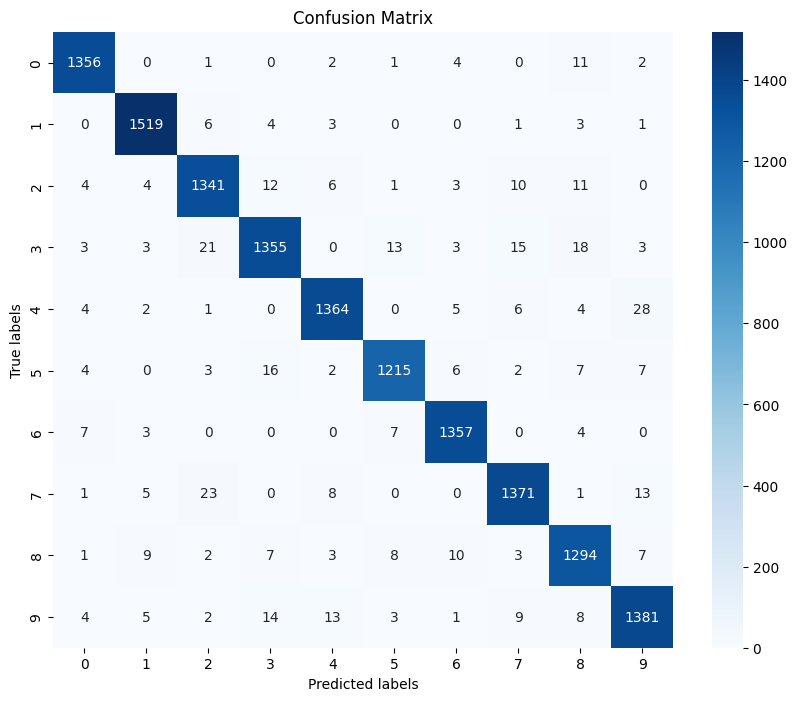


Evaluation Metrics of model RandomForestClassifier(n_jobs=-1, random_state=1497):
Accuracy: 0.9681
Precision: 0.9681
Recall: 0.9681
F1 Score: 0.9681
Average AUC-ROC: 0.0000


In [26]:
# Evaluate the model
accuracy_rf_bl, precision_rf_bl, recall_rf_bl, f1_score_rf_bl, avg_auc_rf_bl, cm_rf_bl = evaluate_model(trained_rf_bl, X_test, y_test, scaler_rf_bl)

- Accuracy is around 97% for baseline model without any parametrers tunning 

#### Model with k-fold cross validation k=3

- we are taking same baseline model as above

The data is scaled properly
The k-fold cross-validation is performed on whole data properly
The predictions on data are done. Evaluation of model RandomForestClassifier(n_jobs=-1, random_state=1497) is now beginning...


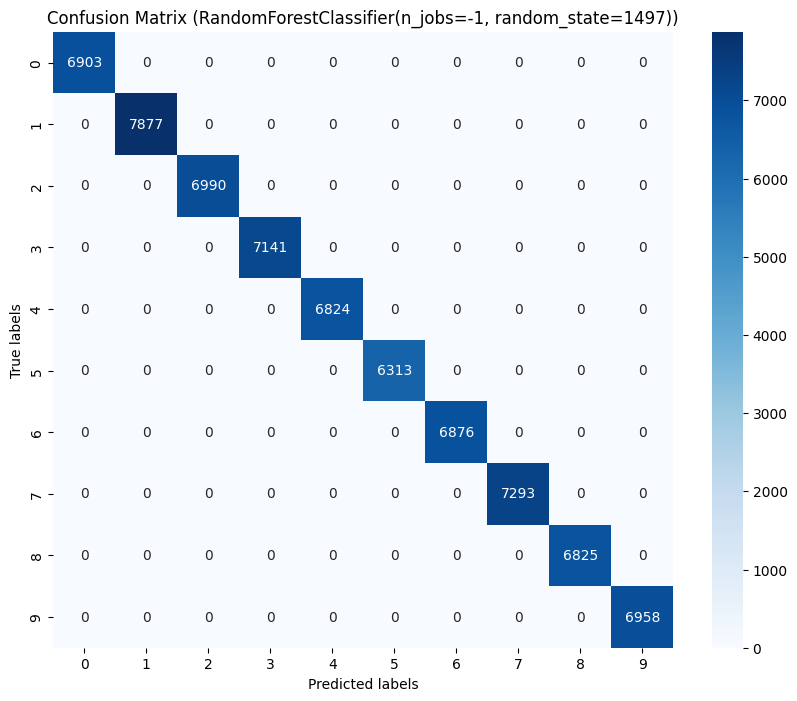

For the model RandomForestClassifier(n_jobs=-1, random_state=1497):
Cross-validation Scores:
Accuracy: 0.9657 ± 0.0021

Test Set Evaluation:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


In [27]:
from sklearn.ensemble import RandomForestClassifier
rf_bl_model = RandomForestClassifier(
    n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
    max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=-1, 
    random_state=1497, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None
)

cv_score_rf_bl_cv, accuracy_rf_bl_cv, precision_rf_bl_cv, recall_rf_bl_cv, f1_score_rf_bl_cv, cm_rf_bl_cv = cross_validate_model(
    rf_bl_model, scaling = 0, X=mnist_skl.data, y=mnist_skl.target
)

- Accuracy decreased from 96.81% to 96.57%. It means there was vey small overfitting.

### K Nearest Neighbours
#### Baseline Model

In [28]:
# Import the model
from sklearn.neighbors import KNeighborsClassifier

# Create the model object
knn_bl_model = KNeighborsClassifier(
    n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=-1
)

# Train the model
trained_knn_bl, scaler_knn_bl = train_model(X_train, y_train, knn_bl_model)

Data Splitted Successfully
The Training data is scaled properly
The training of the model KNeighborsClassifier(n_jobs=-1) is started, please wait for while as it may take few minutes to complete
The Model KNeighborsClassifier(n_jobs=-1) is trained well


The Testing data is scaled properly
The predictions on Test data are done. Evaluation of model KNeighborsClassifier(n_jobs=-1) is now beginning


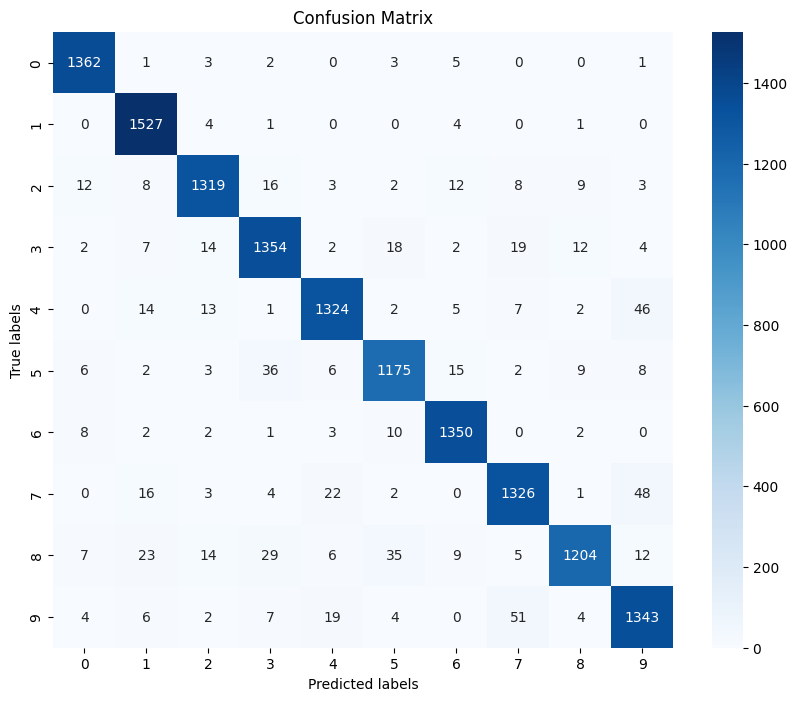


Evaluation Metrics of model KNeighborsClassifier(n_jobs=-1):
Accuracy: 0.9489
Precision: 0.9490
Recall: 0.9489
F1 Score: 0.9487
Average AUC-ROC: 0.0000


In [29]:
# Evaluate the model
accuracy_knn_bl, precision_knn_bl, recall_knn_bl, f1_score_knn_bl, avg_auc_knn_bl, cm_knn_bl = evaluate_model(trained_knn_bl, X_test, y_test, scaler_knn_bl)

- Accuracy is around 95% for baseline model without any parametrers tunning 

#### Model with k-fold cross validation k=3

- we are taking same baseline model as above

The data is scaled properly
The k-fold cross-validation is performed on whole data properly
The predictions on data are done. Evaluation of model KNeighborsClassifier(n_jobs=-1) is now beginning...


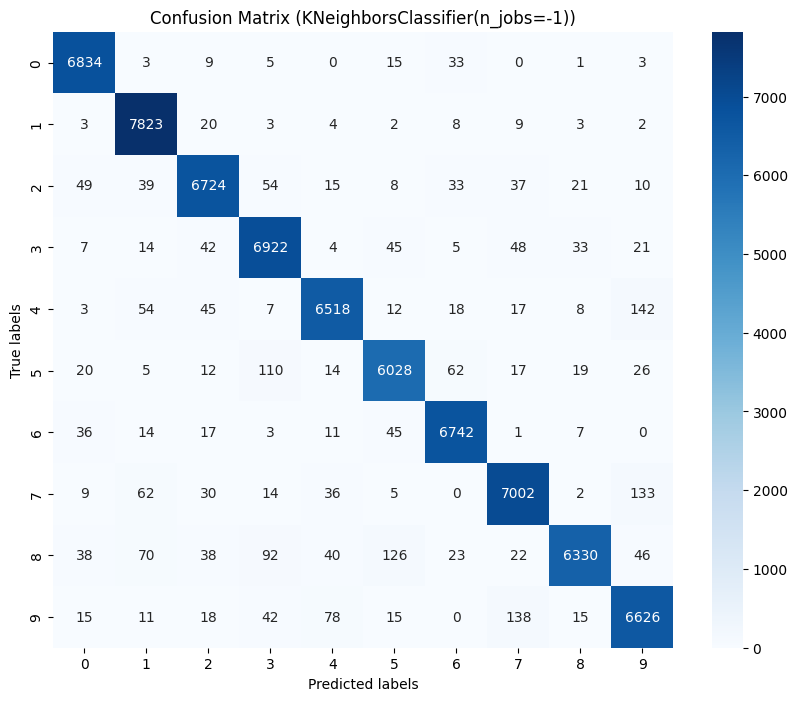

For the model KNeighborsClassifier(n_jobs=-1):
Cross-validation Scores:
Accuracy: 0.9412 ± 0.0025

Test Set Evaluation:
Accuracy: 0.9650
Precision: 0.9651
Recall: 0.9650
F1 Score: 0.9649


In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn_bl_model = KNeighborsClassifier(
    n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=-1
)

cv_score_knn_bl_cv, accuracy_knn_bl_cv, precision_knn_bl_cv, recall_knn_bl_cv, f1_score_knn_bl_cv, cm_knn_bl_cv = cross_validate_model(
    knn_bl_model, X=mnist_skl.data, y=mnist_skl.target
)

- Accuracy decreased from 94.89% to 94.12% Overfitting might be reason for this.

### Schocastic Gradient Descent Classifier
#### Baseline Model

In [31]:
# Import the model
from sklearn.linear_model import SGDClassifier

# Create the model object
sgd_bl_model = SGDClassifier(
    loss='hinge', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, 
    epsilon=0.1, n_jobs=-1, random_state=1497, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, 
    n_iter_no_change=5, class_weight=None, warm_start=False, average=False
)

# Train the model
trained_sgd_bl, scaler_sgd_bl = train_model(X_train, y_train, sgd_bl_model)

Data Splitted Successfully
The Training data is scaled properly
The training of the model SGDClassifier(n_jobs=-1, random_state=1497) is started, please wait for while as it may take few minutes to complete
The Model SGDClassifier(n_jobs=-1, random_state=1497) is trained well


- This classifier has the advantage of being capable of handling very large datasets efficiently. This is in part because SGD deals with training instances independently, one at a time (which also makes SGD well suited for online learning).

The Testing data is scaled properly
The predictions on Test data are done. Evaluation of model SGDClassifier(n_jobs=-1, random_state=1497) is now beginning


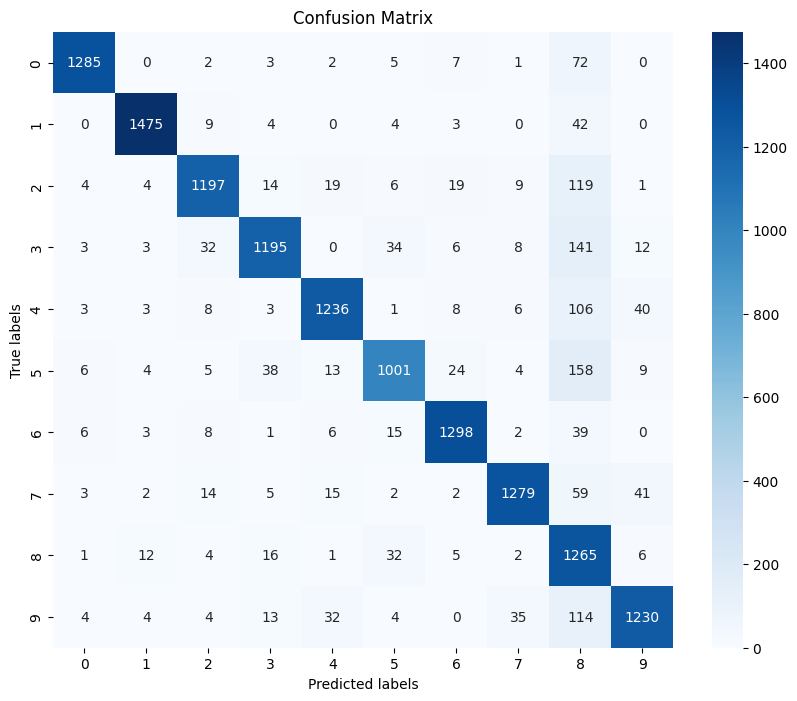


Evaluation Metrics of model SGDClassifier(n_jobs=-1, random_state=1497):
Accuracy: 0.8901
Precision: 0.9084
Recall: 0.8901
F1 Score: 0.8945
Average AUC-ROC: 0.0000


In [32]:
# Evaluate the model
accuracy_sgd_bl, precision_sgd_bl, recall_sgd_bl, f1_score_sgd_bl, avg_auc_sgd_bl, cm_sdg_bl = evaluate_model(trained_sgd_bl, X_test, y_test, scaler_sgd_bl)

- Accuracy is around 89% for baseline model without any parametrers tunning 

#### Model with k-fold cross validation k=3

- we are taking same baseline model as above

The data is scaled properly
The k-fold cross-validation is performed on whole data properly
The predictions on data are done. Evaluation of model SGDClassifier(max_iter=10000, n_jobs=-1, random_state=1497) is now beginning...


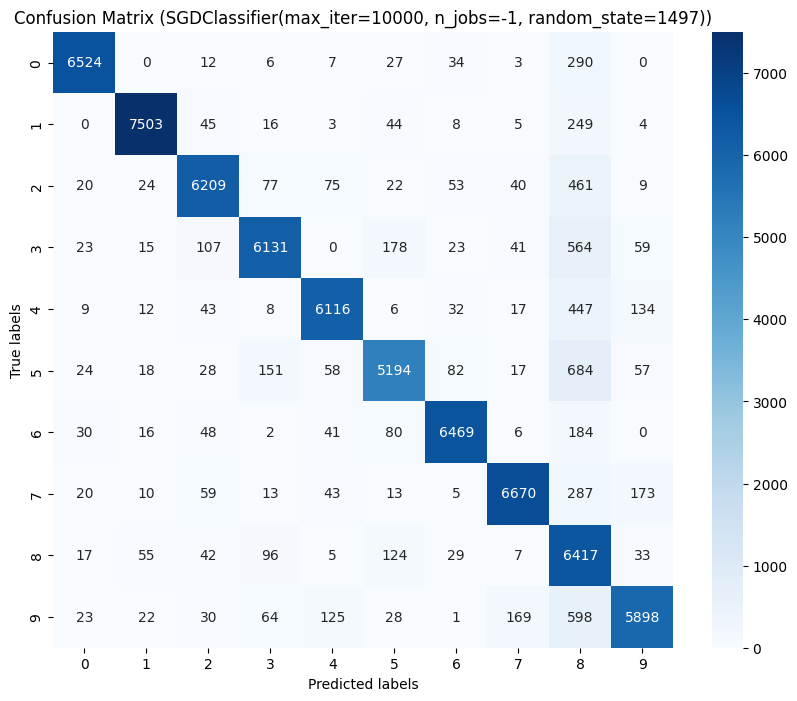

For the model SGDClassifier(max_iter=10000, n_jobs=-1, random_state=1497):
Cross-validation Scores:
Accuracy: 0.9015 ± 0.0031

Test Set Evaluation:
Accuracy: 0.9019
Precision: 0.9166
Recall: 0.9019
F1 Score: 0.9055


In [33]:
from sklearn.linear_model import SGDClassifier
sgd_bl_model = SGDClassifier(
    loss='hinge', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=10000, tol=0.001, shuffle=True, verbose=0, 
    epsilon=0.1, n_jobs=-1, random_state=1497, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, 
    n_iter_no_change=5, class_weight=None, warm_start=False, average=False
)

cv_score_sgd_bl_cv, accuracy_sgd_bl_cv, precision_sgd_bl_cv, recall_sgd_bl_cv, f1_score_sgd_bl_cv, cm_sgd_bl_cv = cross_validate_model(
    sgd_bl_model, X=mnist_skl.data, y=mnist_skl.target
)

- Accuracy increased from 89.01% to 90.18% but there was a warning saying "ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit." So maybe I should try increasing max_iter from 1000 to 10000 and try again.
- Accuracy is almost equal 90.15%

### Multinomial Naive Bias
#### Baseline Model

In [34]:
# Import the model
from sklearn.naive_bayes import MultinomialNB

# Create the model object
nb_bl_model = MultinomialNB(
    alpha=1.0, force_alpha=True, fit_prior=True, class_prior=None
)

# Train the model
trained_nb_bl, scaler_nb_bl = train_model(X_train, y_train, nb_bl_model, scaling=0)

Data Splitted Successfully
The Training data is scaled properly
The training of the model MultinomialNB(force_alpha=True) is started, please wait for while as it may take few minutes to complete
The Model MultinomialNB(force_alpha=True) is trained well


The Testing data is scaled properly
The predictions on Test data are done. Evaluation of model MultinomialNB(force_alpha=True) is now beginning


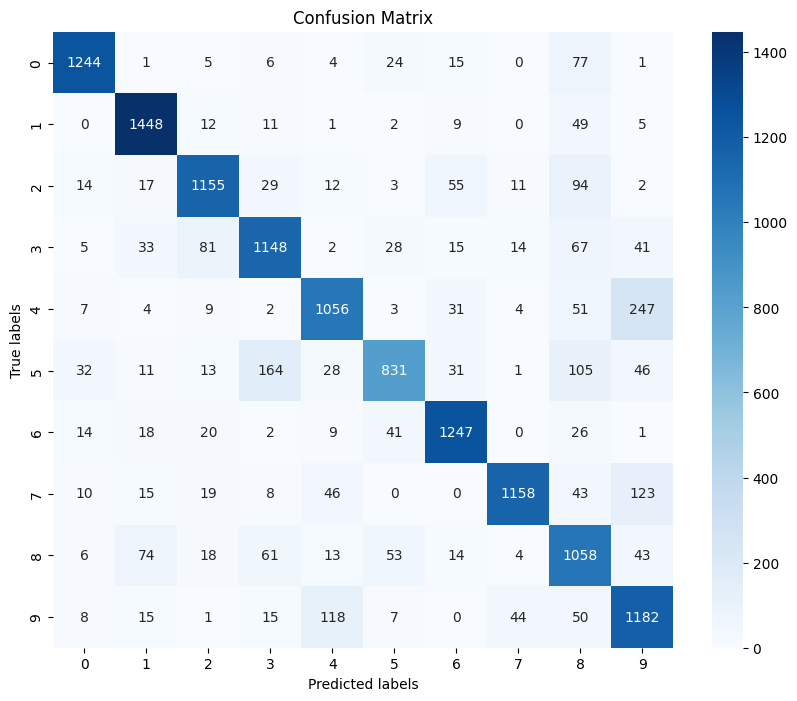


Evaluation Metrics of model MultinomialNB(force_alpha=True):
Accuracy: 0.8234
Precision: 0.8306
Recall: 0.8234
F1 Score: 0.8241
Average AUC-ROC: 0.0000


In [35]:
# Evaluate the model
accuracy_nb_bl, precision_nb_bl, recall_nb_bl, f1_score_nb_bl, avg_auc_nb_bl, cm_nb_bl = evaluate_model(trained_nb_bl, X_test, y_test, scaler_nb_bl)

- Accuracy is around 82% for baseline model without any parametrers tunning 

#### Model with k-fold cross validation k=3

- we are taking same baseline model as above

The data is scaled properly
The k-fold cross-validation is performed on whole data properly
The predictions on data are done. Evaluation of model MultinomialNB(force_alpha=True) is now beginning...


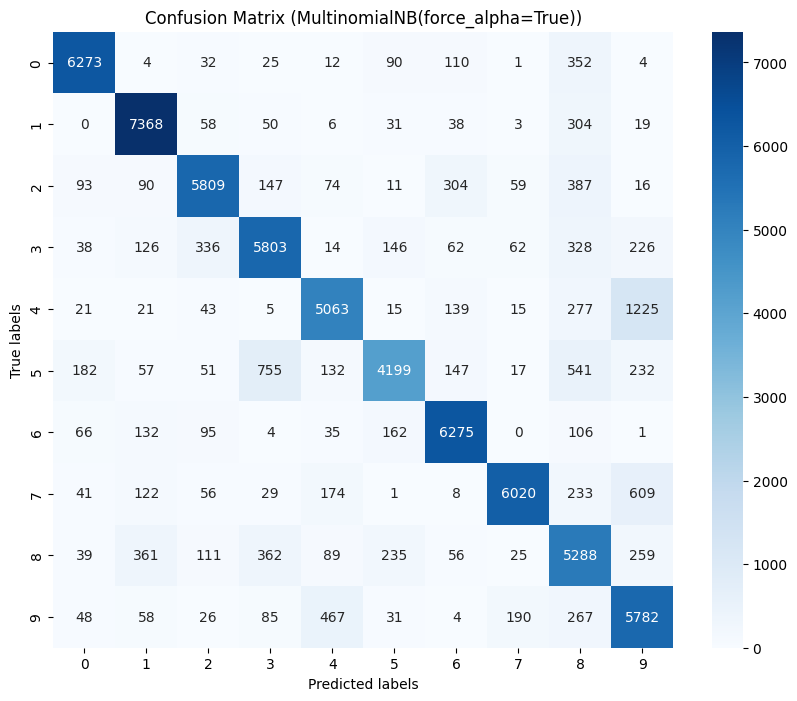

For the model MultinomialNB(force_alpha=True):
Cross-validation Scores:
Accuracy: 0.8256 ± 0.0098

Test Set Evaluation:
Accuracy: 0.8269
Precision: 0.8347
Recall: 0.8269
F1 Score: 0.8277


In [36]:
from sklearn.naive_bayes import MultinomialNB
nb_bl_model = MultinomialNB(
    alpha=1.0, force_alpha=True, fit_prior=True, class_prior=None
)

cv_score_nb_bl_cv, accuracy_nb_bl_cv, precision_nb_bl_cv, recall_nb_bl_cv, f1_score_nb_bl_cv, cm_nb_bl_cv = cross_validate_model(
    nb_bl_model, scaling = 0, X=mnist_skl.data, y=mnist_skl.target
)

- Accuracy increased from 82.34% to 82.56% but it is basically same.

### Multilayered Perceptron
#### Baseline Model

In [37]:
# Import the model
from sklearn.neural_network import MLPClassifier

# Create the model object - default
mlp_bl_model = MLPClassifier(
    hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', 
    learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=1497, tol=0.0001, verbose=False, 
    warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, 
    beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000
)

# Train the model
trained_mlp_bl, scaler_mlp_bl = train_model(X_train, y_train, mlp_bl_model)

Data Splitted Successfully
The Training data is scaled properly
The training of the model MLPClassifier(random_state=1497) is started, please wait for while as it may take few minutes to complete
The Model MLPClassifier(random_state=1497) is trained well


- In this classifier, the input data is normalized. In theory, it's not necessary to normalize numeric x-data (also called independent data). However, practice has shown that when numeric x-data values are normalized, neural network training is often more efficient, which leads to a better predictor

The Testing data is scaled properly
The predictions on Test data are done. Evaluation of model MLPClassifier(random_state=1497) is now beginning


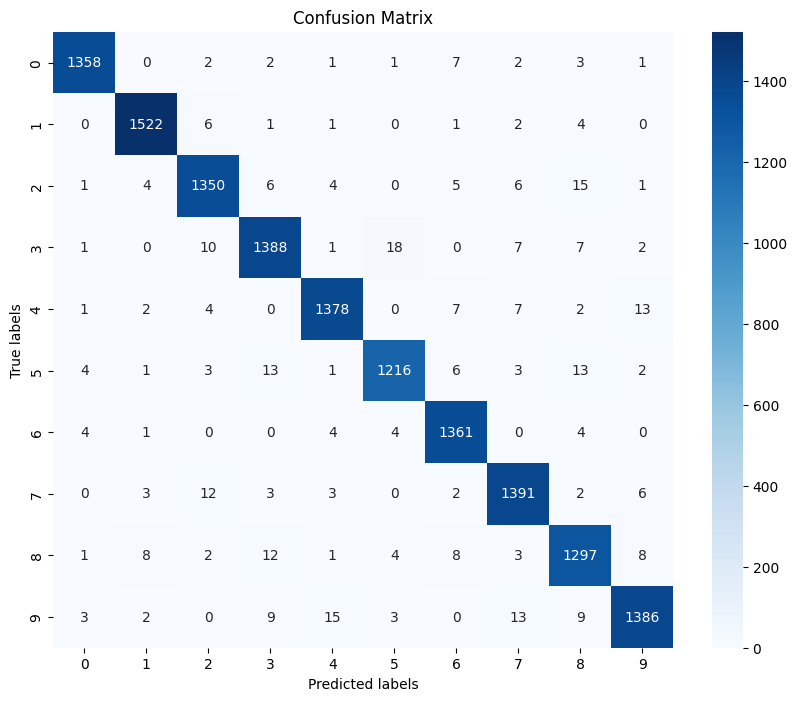


Evaluation Metrics of model MLPClassifier(random_state=1497):
Accuracy: 0.9748
Precision: 0.9748
Recall: 0.9748
F1 Score: 0.9748
Average AUC-ROC: 0.0000


In [38]:
# Evaluate the model
accuracy_mlp_bl, precision_mlp_bl, recall_mlp_bl, f1_score_mlp_bl, avg_auc_mlp_bl, cm_mlp_bl = evaluate_model(trained_mlp_bl, X_test, y_test, scaler_mlp_bl)

- Accuracy is around 97% for baseline model without any parametrers tunning 

#### Model with k-fold cross validation k=3

- we are taking same baseline model as above

The data is scaled properly
The k-fold cross-validation is performed on whole data properly
The predictions on data are done. Evaluation of model MLPClassifier(random_state=1497) is now beginning...


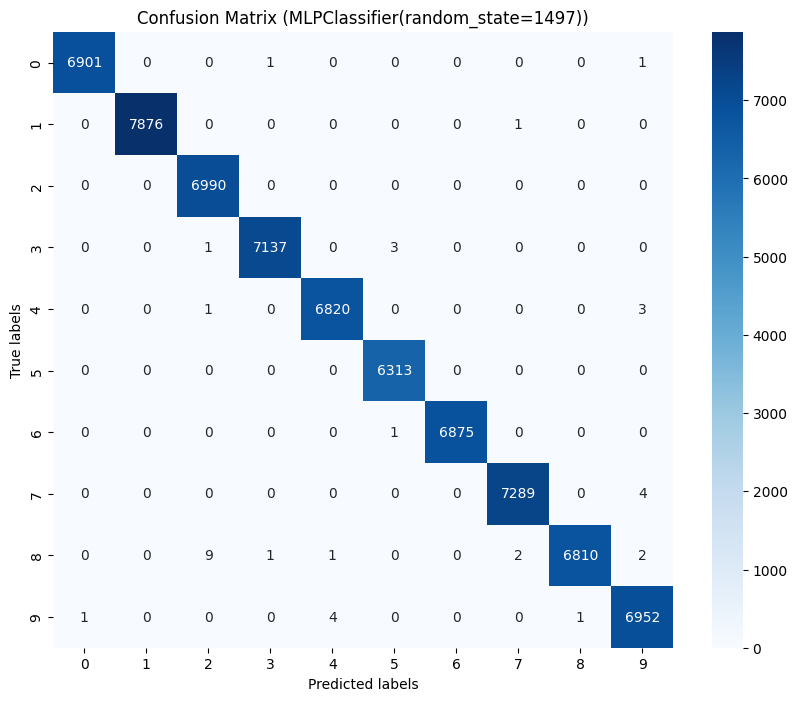

For the model MLPClassifier(random_state=1497):
Cross-validation Scores:
Accuracy: 0.9704 ± 0.0032

Test Set Evaluation:
Accuracy: 0.9995
Precision: 0.9995
Recall: 0.9995
F1 Score: 0.9995


In [39]:
from sklearn.neural_network import MLPClassifier
mlp_bl_model = MLPClassifier(
    hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', 
    learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=1497, tol=0.0001, verbose=False, 
    warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, 
    beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000
)

cv_score_mlp_bl_cv, accuracy_mlp_bl_cv, precision_mlp_bl_cv, recall_mlp_bl_cv, f1_score_mlp_bl_cv, cm_mlp_bl_cv = cross_validate_model(
    mlp_bl_model, X=mnist_skl.data, y=mnist_skl.target
)

- Accuracy decreased from 97.48% to 97.04% but it is basically same. 

## Section 4 - Model Comaprisons

Refer for understanding 'how to choose right ml algorith?' [https://www.geeksforgeeks.org/choosing-a-suitable-machine-learning-algorithm/]

In [40]:
# initialize data of lists.
eval_data = {
    'Model': ['LR', 'SVC', 'DT', 'RF', 'KNN', 'SGD', 'mNB', 'MLP'],
    'Acc Bl': [accuracy_lr_bl, accuracy_svm_svc, accuracy_dt_bl_gini, accuracy_rf_bl, accuracy_knn_bl, accuracy_sgd_bl, accuracy_nb_bl, accuracy_mlp_bl],
    'Acc Bl with 3-cv': [cv_score_lr_bl_cv, cv_score_svm_svc_cv, cv_score_dt_bl_gini_cv, cv_score_rf_bl_cv, cv_score_knn_bl_cv,
                         cv_score_sgd_bl_cv, cv_score_nb_bl_cv, cv_score_mlp_bl_cv]
}

# Create DataFrame
eval_df = pd.DataFrame(eval_data)

# Print the output.
print(eval_df)

  Model    Acc Bl  Acc Bl with 3-cv
0    LR  0.918286          0.909286
1   SVC  0.964571          0.961714
2    DT  0.864000          0.865171
3    RF  0.968071          0.965671
4   KNN  0.948857          0.941186
5   SGD  0.890071          0.901543
6   mNB  0.823357          0.825586
7   MLP  0.974786          0.970400


According to Above results, we can say that - MultiLayered Perceptron classifier, Random Forest classifier, Support Vector Machine classifier and K-Nearest Neighbour are our best choices for Algorithms. In next notebook, we will try Hyperparameter tuning on them as well as using XgBoost classifier.

## Section x -

In [41]:
# import dill as pickle
    
# # Use pickle to save model for next usage.
#filename = 'svmModel.pk'
#with open('./'+filename, 'wb') as file:
#svm_classifier=pickle.load(file)
